In [2]:
import pandas as pd

In [4]:
df_final_demo = pd.read_csv("df_final_demo.txt")
df_final_web_1 = pd.read_csv("df_final_web_data_pt_1.txt")
df_final_web_2 = pd.read_csv("df_final_web_data_pt_2.txt")
df_final_clients = pd.read_csv("df_final_experiment_clients.txt")

In [7]:
df_final_demo = df_final_demo.dropna()
df_final_web_1 = df_final_web_1.dropna()
df_final_web_2 = df_final_web_2.dropna()
df_final_clients = df_final_clients.dropna()

In [14]:
df_final_demo.duplicated().sum()

0

In [15]:
df_final_clients.duplicated().sum()

0

In [8]:
df_final_web_1

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
343136,2443347,465784886_73090545671,136329900_10529659391_316129,confirm,2017-03-31 15:15:46
343137,2443347,465784886_73090545671,136329900_10529659391_316129,step_3,2017-03-31 15:14:53
343138,2443347,465784886_73090545671,136329900_10529659391_316129,step_2,2017-03-31 15:12:08
343139,2443347,465784886_73090545671,136329900_10529659391_316129,step_1,2017-03-31 15:11:37


In [9]:
df_final_web_1['client_id'].nunique()

58391

In [10]:
df_final_web_2['client_id'].nunique()

67430

In [16]:
df_web_all = pd.concat([df_final_web_1,df_final_web_2], axis = 0)

In [17]:
df_web_all.duplicated().sum()

10764

In [18]:
df_web_all.drop_duplicates(inplace=True)

In [19]:
df_web_all

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [20]:
df_final_clients

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
50495,393005,Control
50496,2908510,Control
50497,7230446,Test
50498,5230357,Test


In [22]:
df_final_clients['Variation'].isna().sum()

0

In [23]:
df_final_clients.dropna(inplace=True)

In [24]:
df_web_all_2 = pd.merge(df_web_all, df_final_clients[['client_id', 'Variation']], on='client_id', how='left')


In [25]:
df_web_all_2

,client_id,visitor_id,visit_id,process_step,date_time,Variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test
...,...,...,...,...,...,...
744636,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10,NaN
744637,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29,NaN
744638,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51,NaN
744639,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34,NaN


In [45]:
df_web_all_2['Variation'].isna().sum()

427406

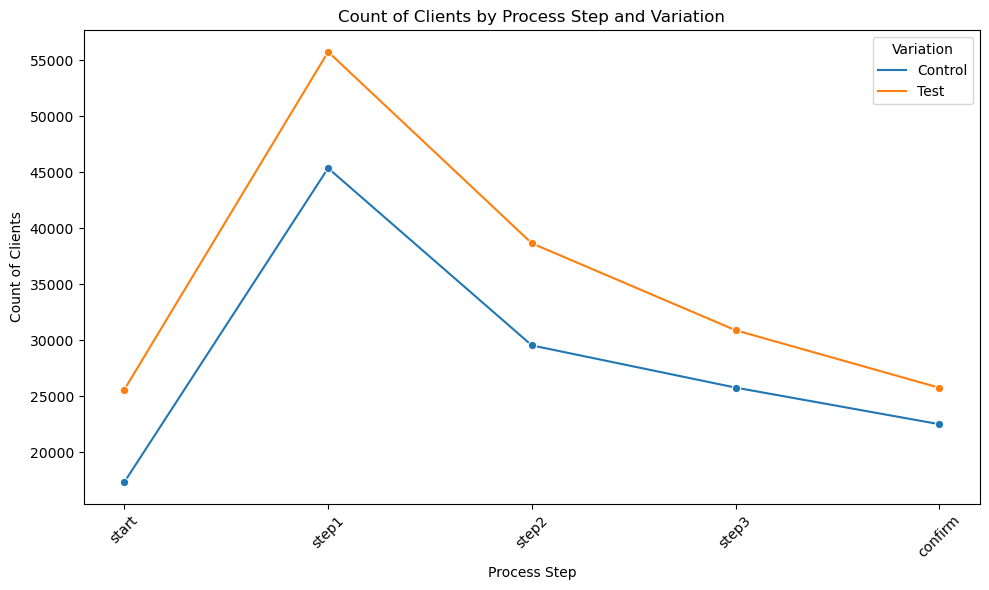

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the custom order for process steps
custom_order = ['start', 'step1', 'step2', 'step3', 'confirm']

# Assuming merged_df is your dataframe containing client_id, process_step, and Variation columns

# Count the number of clients for each process step and variation
counts_df = df_web_all_2.groupby(['process_step', 'Variation']).size().reset_index(name='count')

# Create a line plot with custom order
plt.figure(figsize=(10, 6))
sns.lineplot(data=counts_df, x='process_step', y='count', hue='Variation', marker='o', sort=False)
plt.title('Count of Clients by Process Step and Variation')
plt.xlabel('Process Step')
plt.ylabel('Count of Clients')

# Show the plot
plt.legend(title='Variation')
plt.xticks(range(len(custom_order)), custom_order, rotation=45)
plt.tight_layout()
plt.show()


In [27]:
df_final_demo

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [29]:
quantile_50 = df_final_demo['bal'].quantile(0.5)

In [30]:
primary_clients = df_final_demo[df_final_demo['bal'] >= quantile_50]

In [31]:
primary_clients

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
7,388801,30.0,361.0,57.5,M,5.0,522498.72,1.0,4.0
8,285619,30.0,369.0,67.5,M,2.0,299388.72,3.0,6.0
...,...,...,...,...,...,...,...,...,...
70599,4851159,6.0,79.0,60.0,U,2.0,74501.76,4.0,4.0
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [ ]:
import pandas as pd

# Assuming df is your dataframe containing client_id and bal columns

# Calculate the 0.75 quantile of the 'bal' column
quantile_75 = df['bal'].quantile(0.5)

# Filter the dataframe for primary clients
primary_clients_df = df[df['bal'] >= quantile_75]

# Now primary_clients_df contains only the rows where the balance is from the 0.75 quantile to the maximum value

# You can also reset the index if needed
primary_clients_df.reset_index(drop=True, inplace=True)

print(primary_clients_df)


In [ ]:
df['SalePrice'].quantile(0.1)

In [ ]:
hello is itme you looking for